# LeNet on Cifar with Dropout (0.5)

This is LeNet (6c-16c-120-84) on MNIST. Adam algorithm (lr=0.001) with 100 epoches.


#### LeNet

    Total params: 44,426
    Trainable params: 44,426
    Non-trainable params: 0


####  LeNet with 10 intrinsic dim

    Total params: 488,696
    Trainable params: 10
    Non-trainable params: 488,686
    
#### LeNet with 20000 intrinsic dim    
    Total params: 888,584,426
    Trainable params: 20,000
    Non-trainable params: 888,564,426  

In [1]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
def extract_num(lines0):

    valid_loss_str     = lines0[-5]
    valid_accuracy_str = lines0[-6]
    train_loss_str     = lines0[-8]
    train_accuracy_str = lines0[-9]
    run_time_str       = lines0[-10]

    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

In [28]:
results_dir = '../results/lenet_cifar_dropout'

dim = [10,50,100,500,1000,2000,5000,10000,15000]
i = 0        

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)

diary_names = sorted(diary_names)

i = 0  
diary_names_aug = []
for dn in diary_names:
    if '_dir' not in dn:
        dn_new = dn
        # dn_new = dn[:-6]  + str(dim[i])+ '_dropout' + dn[-6:]
        i +=1
        diary_names_aug.append(dn_new)
    else:
        diary_names_dir = dn

diary_names_ordered=diary_names_aug  
          
# extrinsic update  method
with open(diary_names_dir,'r') as ff:
    lines0 = ff.readlines()
    R_dir = extract_num(lines0)


print "Baseline LeNet:\n" + str(R_dir) + "\n"


# intrinsic update method
Rs = []
i = 0
for fname in diary_names_ordered:
    with open(fname,'r') as ff:
        lines0 = ff.readlines()
        R = extract_num(lines0)
        print "%d dim:\n"%dim[i] + str(R) + "\n"
        i += 1

        Rs.append(R)
                            
Rs = np.array(Rs)




Baseline LeNet:
(1.05339, 0.6339, 1.19131, 0.58802, 365.401)

10 dim:
(3.13658, 0.0989, 7.05503, 0.10036, 398.862)

50 dim:
(2.57586, 0.0929, 4.83271, 0.09798, 394.109)

100 dim:
(2.46547, 0.0955, 4.17996, 0.09816, 369.779)

500 dim:
(2.2005, 0.1863, 2.42888, 0.12918, 379.746)

1000 dim:
(1.96199, 0.2754, 2.14893, 0.18754, 409.556)

2000 dim:
(1.78029, 0.3273, 1.94858, 0.24642, 490.971)

5000 dim:
(1.59584, 0.4194, 1.74932, 0.34194, 792.791)

10000 dim:
(1.40048, 0.4959, 1.5803, 0.42144, 1210.99)

15000 dim:
(1.3509, 0.52, 1.50944, 0.45548, 1748.32)



## Performance comparison with Baseline

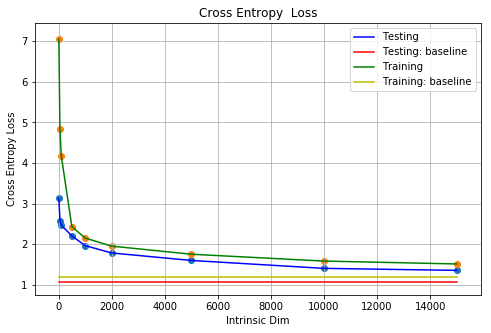

In [29]:
N = len(dim)
fig, ax = subplots(1)
ax.plot(dim, Rs[:,0],'b-', label="Testing")
ax.plot(dim, R_dir[0]*np.ones(N),'r-', label="Testing: baseline")
ax.plot(dim, Rs[:,2],'g-', label="Training")
ax.plot(dim, R_dir[2]*np.ones(N),'y-', label="Training: baseline")

ax.scatter(dim, Rs[:,0])
ax.scatter(dim, Rs[:,2])


ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss')
ax.set_title('Cross Entropy  Loss')
ax.legend()
ax.grid()
# ax.set_ylim([-0.1,3.1])
fig.set_size_inches(8, 5)

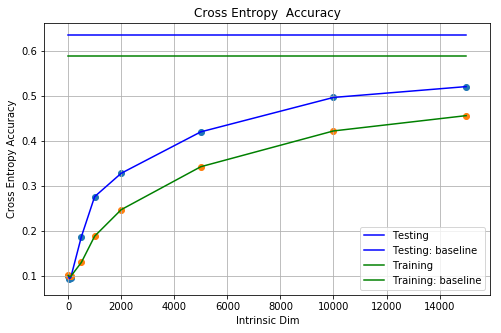

In [30]:
fig, ax = subplots(1)
ax.plot(dim, Rs[:,1],'b-', label="Testing")
ax.plot(dim, R_dir[1]*np.ones(N),'b-', label="Testing: baseline")
ax.plot(dim, Rs[:,3],'g-', label="Training")
ax.plot(dim, R_dir[3]*np.ones(N),'g-', label="Training: baseline")
ax.scatter(dim, Rs[:,1])
ax.scatter(dim, Rs[:,3])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Accuracy')
ax.set_title('Cross Entropy  Accuracy')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,1.01])
fig.set_size_inches(8, 5)

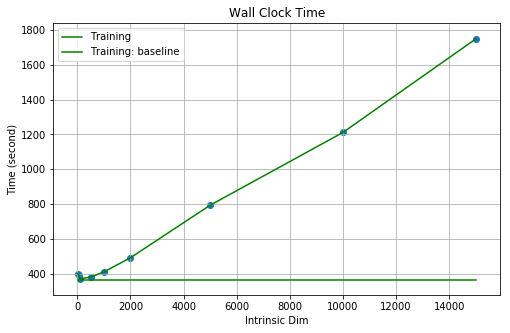

In [31]:
fig, ax = subplots(1)
ax.plot(dim, Rs[:,4],'g-', label="Training")
ax.plot(dim, R_dir[4]*np.ones(N),'g-', label="Training: baseline")
ax.scatter(dim, Rs[:,4])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Time (second)')
ax.set_title('Wall Clock Time')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,100.01])
fig.set_size_inches(8, 5)

## Performance Per Dim

[[  2.78242000e-01   1.04400000e-02   2.77033000e-01   1.08000000e-02
    2.83466000e+01]
 [  4.58944000e-02   3.75800000e-03   4.57274000e-02   3.75160000e-03
    6.16420000e+00]
 [  2.16152000e-02   2.34500000e-03   2.15670000e-02   2.34640000e-03
    3.34556000e+00]
 [  3.41058000e-03   7.85800000e-04   3.39704000e-03   7.90920000e-04
    6.89494000e-01]
 [  1.51444000e-03   4.53900000e-04   1.48573000e-03   4.71260000e-04
    3.69209000e-01]
 [  6.69140000e-04   2.62000000e-04   6.40375000e-04   2.73920000e-04
    2.33359500e-01]
 [  2.38922000e-04   1.17300000e-04   2.13870000e-04   1.24724000e-04
    1.46449200e-01]
 [  1.11838000e-04   6.19600000e-05   8.72310000e-05   6.94060000e-05
    1.15721000e-01]
 [  7.90513333e-05   4.12666667e-05   4.97324000e-05   4.92066667e-05
    1.12802000e-01]]


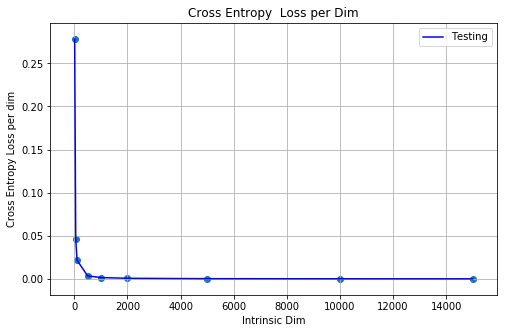

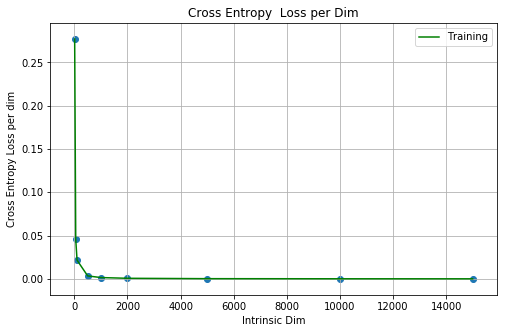

In [13]:
NRs = Rs/np.array(dim).reshape(N,1)
print NRs

fig, ax = subplots(1)
ax.plot(dim, NRs[:,0],'b-', label="Testing")
ax.scatter(dim, NRs[:,0])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

fig, ax = subplots(1)
ax.plot(dim, NRs[:,2],'g-', label="Training")
ax.scatter(dim, NRs[:,2])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

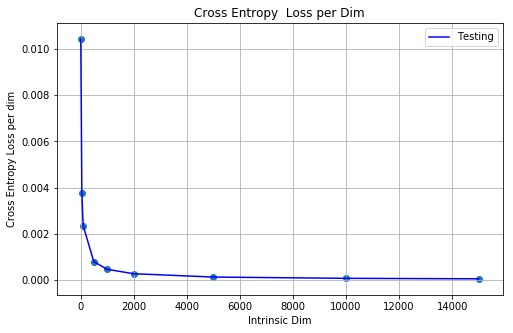

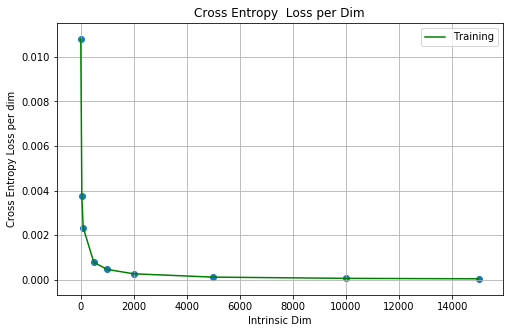

In [14]:
fig, ax = subplots(1)
ax.plot(dim, NRs[:,1],'b-', label="Testing")
ax.scatter(dim, NRs[:,1])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

fig, ax = subplots(1)
ax.plot(dim, NRs[:,3],'g-', label="Training")
ax.scatter(dim, NRs[:,3])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

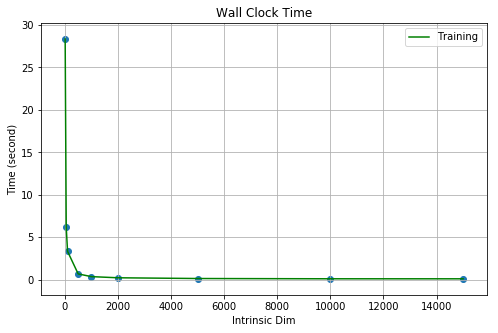

In [15]:
fig, ax = subplots(1)
ax.plot(dim, NRs[:,4],'g-', label="Training")
ax.scatter(dim, NRs[:,4])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Time (second)')
ax.set_title('Wall Clock Time')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,100.01])
fig.set_size_inches(8, 5)